In [ ]:
### CASE STUDY - CUSTOMER LIFETIME VALUE CALCULATION FOR RETAIL COMPANY


In [ ]:
### Tearm and caluclation explanation:

In [ ]:
CLTV = (Customer_Value / Churn_Rate) x Profit_margin

In [ ]:
CLTV = (Customer_Value * Profit_margin) /  Churn_Rate

In [ ]:
- Customer_Value = Average_Order_Value * Purchase_Frequency
- Average_Order_Value = Total_Revenue / Total_Number_of_Orders
- Purchase_Frequency =  Total_Number_of_Orders / Total_Number_of_Customers
- Churn_Rate = 1 - Repeat_Rate
- Also need the Profit_margin

1000 new users. In one year 25% of customers have Retention in one year. What is average lifetime?
- Churn Rate = we will loose 75% of customers in that year.
   - 1 / 0.75 * 12 (Month) = 16 months is average lifetime of a customer
  





In [ ]:
### Importing libraries

In [97]:
# importing libraris 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.colors as mcolors
import squarify

pd.set_option('display.max_columns', 20)
# pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from sklearn.preprocessing import MinMaxScaler

In [4]:
df_ = pd.read_excel("online_retail_II.xlsx",
                    sheet_name="Year 2010-2011")

In [5]:
df = df_.copy()

In [6]:
df.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55000,14688.00000,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42000,14688.00000,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55000,14688.00000,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55000,14688.00000,United Kingdom


In [ ]:
### Data Preparation

In [7]:
#rows with letter C aka cancelled need to be eliminated
canceled_invoice = df[df["Invoice"].str.contains("C", na = False)]

In [8]:
canceled_invoice.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50000,14527.00000,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65000,15311.00000,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65000,17548.00000,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29000,17548.00000,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29000,17548.00000,United Kingdom


In [9]:
canceled_invoice.shape

(9288, 8)

In [10]:
df.shape

(541910, 8)

In [11]:
#new df without cancelled orders
df = df[~df["Invoice"].str.contains("C", na=False)]

In [12]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10000,12680.00000,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15000,12680.00000,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15000,12680.00000,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95000,12680.00000,France


In [13]:
df.shape

(532622, 8)

In [14]:
test_number_correct_new_rows = 541910 - 9288
test_number_correct_new_rows

532622

In [15]:
#checking for rows tht have no or negative quantity
df[(df["Quantity"]< 0)].shape

(1336, 8)

In [16]:
#removing rows that have negative quantity
df = df[(df["Quantity"]> 0)]

In [17]:
df.shape

(531286, 8)

In [18]:
#feature generation - total price paid for specific product per order
df["TotalPrice"] = df["Quantity"] * df["Price"]

<ipython-input-18-a9538bbe230e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalPrice"] = df["Quantity"] * df["Price"]


In [19]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000


In [20]:
df.isnull().sum()

Invoice             0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
Price               0
Customer ID    133361
Country             0
TotalPrice          0
dtype: int64

In [21]:
#removing orders with no customer id or product description
df.dropna(inplace=True)

<ipython-input-21-e66ae13176a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [52]:
print("number of different products: ",df["Description"].nunique())
print("number of different product IDs: ",df["StockCode"].nunique())

number of different products:  3877
number of different product IDs:  3665


In [ ]:
Unique stock code and descriptions should be matching. Since there are more descriptions than stock code, it means that some of the same products with identical product ID have different names (descriptions) although they should have the same.

In [22]:
# one row per customer:
# counting total number of transactions
# summing quantity of each product purchased 
# and total spendings of each customer

cltv_df = df.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(), 
                                        'Quantity': lambda x: x.sum(),
                                        'TotalPrice': lambda x: x.sum()})

In [23]:
#re-naming the new columns
cltv_df.columns = ['total_transaction', 'total_unit', 'total_price']

In [24]:
# index comes from groupby
cltv_df

,total_transaction,total_unit,total_price
Customer ID,,,
12346.00000,1,74215,77183.60000
12347.00000,7,2458,4310.00000
12348.00000,4,2341,1797.24000
12349.00000,1,631,1757.55000
12350.00000,1,197,334.40000
...,...,...,...
18280.00000,1,45,180.60000
18281.00000,1,54,80.82000
18282.00000,2,103,178.05000


In [25]:
cltv_df.shape

(4339, 3)

In [26]:
#feature generation: calculating average revenue per user 
cltv_df["avg_order_value"] = cltv_df["total_price"] / cltv_df["total_transaction"]

In [27]:
cltv_df.head()

,total_transaction,total_unit,total_price,avg_order_value
Customer ID,,,,
12346.00000,1,74215,77183.60000,77183.60000
12347.00000,7,2458,4310.00000,615.71429
12348.00000,4,2341,1797.24000,449.31000
12349.00000,1,631,1757.55000,1757.55000
12350.00000,1,197,334.40000,334.40000


In [28]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_transaction,4339.00000,4.27195,7.70549,1.00000,1.00000,2.00000,5.00000,210.00000
total_unit,4339.00000,1194.21457,5055.60301,1.00000,160.00000,379.00000,993.00000,197491.00000
total_price,4339.00000,2053.79717,8988.24784,0.00000,307.24500,674.45000,1661.64000,280206.02000
avg_order_value,4339.00000,419.04874,1796.32070,0.00000,178.50500,293.69000,430.02250,84236.25000


In [ ]:
50% is also called the median. The median and mean are mismatching in this dataset meaning there are likely to be outliers. Median less than mean = right scewed data. Ether many outliers or a few big ones

In [ ]:
#### Outlier calculation function

In [29]:
# defining at which value data is considered an outlier. 
# this function will only be called within the function below

def outlier_tresholds(dataframe, col_name, q1 = 0.25, q3 =0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

In [30]:
#calling the function from above inside new function to replace outliers with highest/lowest possible value
# method is called Capping
def replace_with_tresholds(dataframe, variable):
    low_limit, up_limit = outlier_tresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [31]:
#searching/replacing outliers in these columns
outlierTest = ["total_transaction","total_unit","total_price","avg_order_value"]

In [32]:
#calling function defined above
for col in outlierTest:
    replace_with_tresholds(cltv_df, col)

In [33]:
cltv_df.head()

,total_transaction,total_unit,total_price,avg_order_value
Customer ID,,,,
12346.00000,1.00000,2242.50000,3693.23250,807.29875
12347.00000,7.00000,2242.50000,3693.23250,615.71429
12348.00000,4.00000,2242.50000,1797.24000,449.31000
12349.00000,1.00000,631.00000,1757.55000,807.29875
12350.00000,1.00000,197.00000,334.40000,334.40000


In [34]:
cltv_df.shape

(4339, 4)

In [35]:
total_customers = cltv_df.shape[0]

In [36]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_transaction,4339.00000,3.48629,3.04007,1.00000,1.00000,2.00000,5.00000,11.00000
total_unit,4339.00000,685.32968,699.48092,1.00000,160.00000,379.00000,993.00000,2242.50000
total_price,4339.00000,1162.64904,1148.07508,0.00000,307.24500,674.45000,1661.64000,3693.23250
avg_order_value,4339.00000,333.18953,202.65514,0.00000,178.50500,293.69000,430.02250,807.29875


In [ ]:
Median and mean are much closer together now. Good! Still not ideal because median still higher than mean.

In [37]:
cltv_df.head()

,total_transaction,total_unit,total_price,avg_order_value
Customer ID,,,,
12346.00000,1.00000,2242.50000,3693.23250,807.29875
12347.00000,7.00000,2242.50000,3693.23250,615.71429
12348.00000,4.00000,2242.50000,1797.24000,449.31000
12349.00000,1.00000,631.00000,1757.55000,807.29875
12350.00000,1.00000,197.00000,334.40000,334.40000


In [38]:
# calculating average number of purchases per client
purchase_frequency = cltv_df['total_transaction'].sum() / total_customers
purchase_frequency

3.4862871629407697

In [ ]:
### Calculate repeat rate and churn rate

In [39]:
# calculate rate of returning clients 
repeat_rate = cltv_df[cltv_df['total_transaction'] > 1].shape[0] / total_customers
repeat_rate

0.6556810324959668

In [40]:
churn_rate = 1 - repeat_rate # in one year
churn_rate

0.34431896750403324

In [ ]:
65% of customers are considered returning customers while 34% of customers churn after their first purchase

In [41]:
#time customer remains engaged aka Life time
LT = 1/churn_rate 
print(round(LT), "Years users stay active")
print(round(LT*12), "Months users stay active")

3 Years users stay active
35 Months users stay active


In [ ]:
### Calculate customer lifetime value

In [42]:
CLTV = LT * purchase_frequency * cltv_df.avg_order_value.mean()*0.15 #0.15 is given profit margin

print("Customer lifetime value for all customers :", CLTV)

Customer lifetime value for all customers : 506.0399691037807


In [43]:
# suppose the customer acquisition cost is 500 pounds
CAC = 500
CLTV_CAC_Ratio = CLTV/CAC

print("The Customer lifetime value to Customer acquisition cost Ratio is: ", round(CLTV_CAC_Ratio, 3))
if CLTV_CAC_Ratio > 1:
    print("Ratio over 1 indicated the business is acquiring customers profitably")
else:
    print("The acquisition costs are too high for the amound of revenue customers are expected to generate therefore it would be more profitable to spend more money in retaining customers")

The Customer lifetime value to Customer acquisition cost Ratio is:  1.012
Ratio over 1 indicated the business is acquiring customers profitably


In [ ]:
For every £1 spent on acquiring a customer (CAC), the business expects to earn £1.012 in revenue over the customer's lifetime. This ratio greater than 1 suggests that the business is generating more revenue from each customer than it's spending to acquire them

In [44]:
cltv_df.head() 

,total_transaction,total_unit,total_price,avg_order_value
Customer ID,,,,
12346.00000,1.00000,2242.50000,3693.23250,807.29875
12347.00000,7.00000,2242.50000,3693.23250,615.71429
12348.00000,4.00000,2242.50000,1797.24000,449.31000
12349.00000,1.00000,631.00000,1757.55000,807.29875
12350.00000,1.00000,197.00000,334.40000,334.40000


In [ ]:
### Rule Based Segmentation

In [ ]:
In order to do specific marketing campaigns for

In [45]:
#splitting the data
cltv_df["segment"] = pd.qcut(cltv_df["avg_order_value"], 4, labels= ["D", "C", "B", "A"])

In [46]:
cltv_df.groupby("segment")[["avg_order_value", "total_transaction"]].agg({"count" , "mean"})

avg_order_value       total_transaction      
                   mean count              mean count
segment                                              
D             123.75338  1085           2.59171  1085
C             230.52516  1085           3.70230  1085
B             352.54848  1084           3.69926  1084
A             625.94896  1085           3.95207  1085

In [ ]:
Splitting customers into segments as done above allows businesses to make data-driven decisions tailored to different customer groups. This can lead to more effective marketing, increased customer satisfaction, and ultimately, improved financial performance.

1. **Targeted Marketing**: For example, they can send special offers or promotions to high-value segments (e.g., 'A' segment with high average order value) to maximize revenue and retention, while sending re-engagement offers to lower-value segments.


2. **Personalization**: Understanding customer segments helps in personalizing communication and product recommendations. High-value customers might prefer premium services or products, while budget-conscious customers may appreciate discounts.


3. **Pricing Strategies**: Different segments may respond differently to pricing strategies. Businesses can optimize pricing models for each segment to maximize revenue and profitability.


4. **Product Development**: For instance, high-value segments may indicate opportunities for premium products, while other segments may guide the development of budget-friendly options.


5. **Retention Strategies**: For example, loyalty programs or referral incentives can be tailored to these segments.


6. **Inventory Management**: It can ensure that products preferred by high-value segments are well-stocked and readily available.


7. **Customer Service**:  High-value customers may appreciate proactive support, while others may prefer self-service options.


8. **Predictive Analytics**: For example, businesses can predict which customers are likely to churn and take proactive steps to retain them.


9. **Resource Allocation**: Businesses can allocate marketing budgets, sales efforts, and customer support resources based on the potential return from each segment.



In [ ]:
## RFM - Analysis

In [48]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000


In [ ]:
#counting together the number of objects with same description  

In [53]:
df.groupby("Description").agg({"StockCode":"count"}).sort_values(by="StockCode", ascending=False)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2028
REGENCY CAKESTAND 3 TIER,1724
JUMBO BAG RED RETROSPOT,1618
ASSORTED COLOUR BIRD ORNAMENT,1408
PARTY BUNTING,1397
...,...
"BREAD BIN, DINER STYLE, MINT",1
"WALL ART , THE MAGIC FOREST",1
LUNCH BAG RED SPOTTY,1


In [54]:
df.groupby("StockCode").agg({"Customer ID":"count"}).sort_values(by="Customer ID",ascending=False)

,Customer ID
StockCode,
85123A,2035
22423,1724
85099B,1618
84879,1408
47566,1397
...,...
37379A,1
21268,1
90141D,1


In [55]:
set(df[df.StockCode == "85123A"]["Description"])

{'CREAM HANGING HEART T-LIGHT HOLDER', 'WHITE HANGING HEART T-LIGHT HOLDER'}

In [56]:
df[df.StockCode == "85123A"]["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2028
CREAM HANGING HEART T-LIGHT HOLDER       7
Name: Description, dtype: int64

In [59]:
df[df.Description == "CREAM HANGING HEART T-LIGHT HOLDER"]["StockCode"].value_counts()

85123A    7
Name: StockCode, dtype: int64

In [ ]:
7 products with the same stock code received the wrong description. 


In [60]:
#Finding the 5 most ordered products
df.groupby("Description").agg({"Quantity":"sum"}).sort_values(by="Quantity",ascending=False).head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725


In [ ]:
##### Calculating Recency

In [64]:
today_date=dt.datetime(2011,12,31) #todays date

In [65]:
df.groupby("Customer ID").agg({"InvoiceDate": lambda x :(today_date-x.max()).days})

,InvoiceDate
Customer ID,
12346.00000,346
12347.00000,23
12348.00000,96
12349.00000,39
12350.00000,331
...,...
18280.00000,298
18281.00000,201
18282.00000,28


In [66]:
df.groupby("Customer ID").agg({"TotalPrice": "sum"})

,TotalPrice
Customer ID,
12346.00000,77183.60000
12347.00000,4310.00000
12348.00000,1797.24000
12349.00000,1757.55000
12350.00000,334.40000
...,...
18280.00000,180.60000
18281.00000,80.82000
18282.00000,178.05000


In [67]:
rfm=df.groupby("Customer ID").agg({"InvoiceDate": lambda x :(today_date-x.max()).days,
                               "Invoice": lambda x : x.nunique(),
                               "TotalPrice":lambda x : x.sum()})

In [68]:
rfm.columns

Index(['InvoiceDate', 'Invoice', 'TotalPrice'], dtype='object')

In [69]:
#renaiming
rfm.columns=['recency', 'frequency', 'monetary']

In [70]:
rfm=rfm[rfm["monetary"]>0]

In [ ]:
#Generating RFM scores and converting them to a single variable 

In [71]:
rfm["receny_score"] = pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1])
rfm.head()


,recency,frequency,monetary,receny_score
Customer ID,,,,
12346.00000,346,1,77183.60000,1
12347.00000,23,7,4310.00000,5
12348.00000,96,4,1797.24000,2
12349.00000,39,1,1757.55000,4
12350.00000,331,1,334.40000,1


In [72]:
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
pd.crosstab( rfm.frequency,rfm.frequency_score )

frequency_score,1,2,3,4,5
frequency,,,,,
1,868,625,0,0,0
2,0,242,593,0,0
3,0,0,275,233,0
4,0,0,0,387,0
5,0,0,0,243,0
6,0,0,0,4,168
7,0,0,0,0,143
8,0,0,0,0,98
9,0,0,0,0,68


In [73]:
rfm["monetary_score"] = pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])

In [74]:
rfm["rfm_score"]=rfm["receny_score"].astype("str")+rfm["frequency_score"].astype("str")

In [75]:
rfm.head()

,recency,frequency,monetary,receny_score,frequency_score,monetary_score,rfm_score
Customer ID,,,,,,,
12346.00000,346,1,77183.60000,1,1,5,11
12347.00000,23,7,4310.00000,5,5,5,55
12348.00000,96,4,1797.24000,2,4,4,24
12349.00000,39,1,1757.55000,4,1,4,41
12350.00000,331,1,334.40000,1,1,2,11


In [76]:
#Defining each segment by score
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [77]:
rfm['segment'] = rfm['rfm_score'].replace(seg_map, regex=True)

In [78]:
rfm.reset_index().head() 

,Customer ID,recency,frequency,monetary,receny_score,frequency_score,monetary_score,rfm_score,segment
0,12346.00000,346,1,77183.60000,1,1,5,11,hibernating
1,12347.00000,23,7,4310.00000,5,5,5,55,champions
2,12348.00000,96,4,1797.24000,2,4,4,24,at_Risk
3,12349.00000,39,1,1757.55000,4,1,4,41,promising
4,12350.00000,331,1,334.40000,1,1,2,11,hibernating


In [79]:
rfm_count = rfm["segment"].value_counts()
rfm_count

hibernating            1071
loyal_customers         819
champions               633
at_Risk                 593
potential_loyalists     484
about_to_sleep          352
need_attention          187
promising                94
cant_loose               63
new_customers            42
Name: segment, dtype: int64

In [ ]:
We have 59 customers in the "cant_loose" category on which we are focusing our marketing strategy. 

In [82]:
#deviding standard deviation by mean = coefficiant of variation
#shows the extent of variability in relation to the mean of the population. The higher the CV, the greater the dispersion.


rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["mean", "std" ,"median" , "count" , lambda x : np.std(x) / np.mean(x)])


recency                                  frequency  \
                         mean      std median count <lambda_0>      mean   
segment                                                                    
about_to_sleep       73.31250 10.94347     73   352    0.14906   1.16193   
at_Risk             173.78583 68.61883    159   593    0.39451   2.87858   
cant_loose          152.96825 65.25038    128    63    0.42316   8.38095   
champions            26.36177  3.68330     25   633    0.13961  12.41706   
hibernating         237.60504 92.01356    239  1071    0.38707   1.10177   
loyal_customers      53.60806 15.57705     50   819    0.29040   6.47985   
need_attention       72.42781 11.55207     72   187    0.15907   2.32620   
new_customers        27.42857  3.90211     28    42    0.14056   1.00000   
potential_loyalists  37.39876  9.33881     38   484    0.24945   2.01033   
promising            43.51064  5.19252     43    94    0.11870   1.00000   

                                                       monetary              \
                         std median count <lambda_0>       mean         std   
segment                                                                       
about_to_sleep       0.36891      1   352    0.31705  471.99437   533.59058   
at_Risk              0.95442      3   593    0.33128 1084.53530  2562.07336   
cant_loose           4.28963      7    63    0.50775 2796.15587  2090.48998   
champions           16.47648      8   633    1.32587 6857.96392 20339.76384   
hibernating          0.30249      1  1071    0.27442  488.64331  2419.68263   
loyal_customers      4.54567      5   819    0.70108 2864.24779  6007.06188   
need_attention       0.47008      2   187    0.20154  897.62786  1102.50339   
new_customers        0.00000      1    42    0.00000  388.21286   570.77629   
potential_loyalists  0.65140      2   484    0.32369 1041.22200  7656.32388   
promising            0.00000      1    94    0.00000  294.00798   240.40663   

                                                 
                        median count <lambda_0>  
segment                                          
about_to_sleep       330.05000   352    1.12890  
at_Risk              678.25000   593    2.36038  
cant_loose          2225.97000    63    0.74167  
champions           2612.96000   633    2.96352  
hibernating          296.25000  1071    4.94953  
loyal_customers     1740.48000   819    2.09598  
need_attention       638.06000   187    1.22495  
new_customers        274.50500    42    1.45266  
potential_loyalists  521.27500   484    7.34561  
promising            221.42500    94    0.81333

In [83]:
rfm.reset_index()

,Customer ID,recency,frequency,monetary,receny_score,frequency_score,monetary_score,rfm_score,segment
0,12346.00000,346,1,77183.60000,1,1,5,11,hibernating
1,12347.00000,23,7,4310.00000,5,5,5,55,champions
2,12348.00000,96,4,1797.24000,2,4,4,24,at_Risk
3,12349.00000,39,1,1757.55000,4,1,4,41,promising
4,12350.00000,331,1,334.40000,1,1,2,11,hibernating
...,...,...,...,...,...,...,...,...,...
4333,18280.00000,298,1,180.60000,1,2,1,12,hibernating
4334,18281.00000,201,1,80.82000,1,2,1,12,hibernating
4335,18282.00000,28,2,178.05000,5,3,1,53,potential_loyalists
4336,18283.00000,24,16,2094.88000,5,5,5,55,champions


In [84]:
cant_loose = rfm[rfm["segment"] == "cant_loose"] 

In [85]:
rfm[["segment","recency","frequency","monetary"]].head()

,segment,recency,frequency,monetary
Customer ID,,,,
12346.00000,hibernating,346,1,77183.60000
12347.00000,champions,23,7,4310.00000
12348.00000,at_Risk,96,4,1797.24000
12349.00000,promising,39,1,1757.55000
12350.00000,hibernating,331,1,334.40000


In [86]:
# Percentage of revenue of each segment
rfm.groupby("segment")["monetary"].sum().sort_values(ascending=False) / rfm["monetary"].sum()

segment
champions             0.48714
loyal_customers       0.26324
at_Risk               0.07217
hibernating           0.05873
potential_loyalists   0.05655
cant_loose            0.01977
need_attention        0.01884
about_to_sleep        0.01864
promising             0.00310
new_customers         0.00183
Name: monetary, dtype: float64

In [87]:
# Percentage of revenue just for can't loose segment 
cant_loose.groupby("segment")["monetary"].sum().sort_values(ascending=False) / cant_loose["monetary"].sum()


segment
cant_loose   1.00000
Name: monetary, dtype: float64

In [88]:
pareto_data = pd.DataFrame({"size" : rfm.groupby("segment")["monetary"].count() /rfm["monetary"].count(),
              "revenue"  : rfm.groupby("segment")["monetary"].sum() / rfm["monetary"].sum()}).sort_values(by= "revenue" ,ascending=False)
pareto_data

,size,revenue
segment,,
champions,0.14592,0.48714
loyal_customers,0.18880,0.26324
at_Risk,0.13670,0.07217
hibernating,0.24689,0.05873
potential_loyalists,0.11157,0.05655
cant_loose,0.01452,0.01977
need_attention,0.04311,0.01884
about_to_sleep,0.08114,0.01864
promising,0.02167,0.00310


In [89]:
# list of customers to target with marketing campaign

In [90]:
cant_loose=rfm[rfm["segment"]=="cant_loose"].reset_index()[["Customer ID","segment"]]
cant_loose

,Customer ID,segment
0,12643.00000,cant_loose
1,12853.00000,cant_loose
2,12868.00000,cant_loose
3,12947.00000,cant_loose
4,12980.00000,cant_loose
...,...,...
58,18037.00000,cant_loose
59,18073.00000,cant_loose
60,18094.00000,cant_loose
61,18168.00000,cant_loose


In [95]:
cmap = plt.cm.coolwarm
mini = min(rfm.reset_index()['Customer ID'])
maxi = max(rfm.reset_index()['Customer ID'])
norm = mcolors.Normalize(vmin=mini,vmax=maxi)

In [100]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

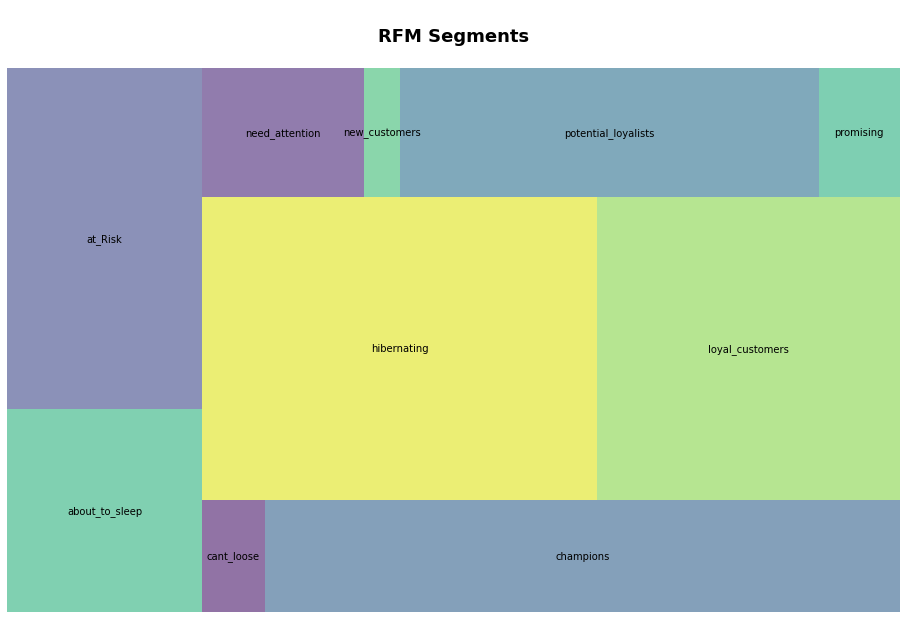

In [101]:
#Create our plot and resize it.
segments = ['about_to_sleep',
                     'at_Risk',
                     'cant_loose',
                     'champions',
                     'hibernating', 
                     'loyal_customers',
                     'need_attention',
                     'new_customers',
                     'potential_loyalists',
                     'promising']

#colors = ['red','green','yellow','blue','gray','black','orange','purple','cyan','pink']

fig = plt.gcf()
ax = fig.add_subplot()
norm = mcolors.Normalize(vmin=mini,vmax=maxi)
colors = [cmap(norm(value)) for value in rfm.reset_index()['Customer ID']]
fig.set_size_inches(16, 10)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label = segments, alpha=.6)
plt.title("\nRFM Segments\n",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

The hibernating segment is the biggest segment followed by loyal customers and champions, this is good because the majority of the customers are either attached to the company, loyal and champions, or just need a marketing strategy that pushes them to return, hibernating. This segments are closely followed by the 'At risk' segment, which is something the company should take into consideration and also target them to make them return.

Since according to our previous calculations, the user retention is more profitable than new user acquisition, we need to focus some attention towards the clients falling into the at risk segment. 

Now we know how many customers and exactly which customers we need to target with our marketing strategy. 
As we know that the cant loose segment used to purchase very frequently, it could be suggested to invite them to an exclusive event in the show room. With some music, snacks and the personal advisor the customers can be reminded of what they used to love about the brand. 

Alternativly, if due to covid no social gatherings are permitted for example, single invitations should be sent out to each customer, inviting them to a personal consultation, luering them with special sale offerings. The sale should be very high to make sure that the customers are intreaged to come to the store as we believe that once they are catched, they will be awoken and continuously make frequent purchases as they used to. Personalizing each invitation with the customers name is also a good strategy to make them feel special and entice them to come by the store.

Another campaign could be to create stamp card like at some coffee houses. As these customers are known to frequently make purchases the idea of getting a free item might be very interesting as they know that they can easily fill the card from their past experience. 

In order to find out how much we can invest into the marketing campaign, we want to know how much each of these customers are truly worth. Based on that understanding a data driven budget can be fixed. Therefore it would be useful to also do a Customer Lifetime Value Analysis. 